In [1]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import copy


Otimização Natural  - Lista de exercícios 2

01) Lista de Exercícios da CPE723 Edição Presencial - Exercício 1. No item 1(b), onde está escrito "três números aleatórios equiprováveis", leia-se "três números aleatórios, sorteados de PDF uniforme entre 0 e 1". 

![q1](img/Q1.png)


### ITEM a ###
P(3) = 
[[0.3765625]
 [0.378125 ]
 [0.4890625]]


### ITEM b ###
Valor final: 1 


### ITEM c ###
History shape: (100, 4)
History max: 2
History min: 0



### ITEM d ###


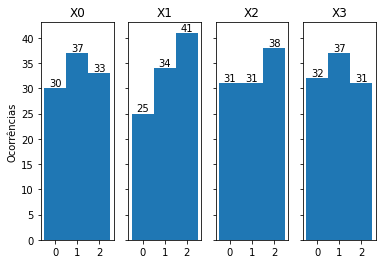

In [2]:
################# item a #################
transition_matrix = np.array([[0.50, 0.25, 0.25],
                              [0.25, 0.50, 0.25],
                              [0.50, 0.25, 0.50]])

p0 = np.array([[.3, .4, .3]]).T

tm_3 = np.linalg.matrix_power(transition_matrix, 3)

p_3 = np.matmul(tm_3, p0)

print("### ITEM a ###")
print("P(3) = \n{}\n\n".format(p_3))

################# item b #################
p0 = np.array([[0.0, 1.0, 0.0]]).T


def transition(X):
    transition_vec = transition_matrix.T[X]
    r = rd.uniform(0, 1)
    if r < transition_vec[0]:
        return 0
    if r < sum(transition_vec[0:2]):
        return 1
    else:
        return 2


X = 1
for _ in range(3):
    X = transition(X)

print("### ITEM b ###")
print("Valor final: {} \n\n".format(X))


################# item c #################
history = []
episode = []

for _ in range(100):
    X = rd.choice([0, 1, 2])
    episode.append(X)
    for _ in range(3):
        X = transition(X)
        episode.append(X)

    history.append(episode)
    episode = []

history = np.array(history)

print("### ITEM c ###")
print("History shape: {}".format(history.shape))
print("History max: {}".format(history.max()))
print("History min: {}".format(history.min()))

################# item d #################
print("\n\n")
print("### ITEM d ###")

fig, ax = plt.subplots(1, 4, sharey=True)
fig.axes[0].set_ylabel("Ocorrências")
for i in range(len(history.T)):
    x = history.T[i]
    bars_i = ax[i].hist(x, bins=(np.arange(4)-0.5))
    ax[i].bar_label(bars_i[-1], [int(l) for l in bars_i[0]])
    ax[i].set_title("X{}".format(i))
    ax[i].set_xticks((0, 1, 2))


02) Lista de Exercícios da CPE723 Edição Presencial - Exercício 2.

![q2](img/Q2.png)


#### item a ####
Problema modificado, proposto na lista 2 enviada em 14ABR22:
[[0.         0.02489353 0.         0.         0.18393972]
 [0.5        0.79116675 0.5        0.         0.        ]
 [0.         0.18393972 0.         0.06766764 0.        ]
 [0.         0.         0.5        0.90743882 0.5       ]
 [0.5        0.         0.         0.02489353 0.31606028]]
#### item b ####
#### item c ####
O vetor invariante corresponde ao autovetor "normalizado" para somar 1, associado ao autovalorunitário
[-0.2011531  -0.12825659  0.47911751  1.          0.86495802]
[[ 0.53977811 -0.06865538  0.2580187   0.01703161 -0.01483644]
 [-0.49203598 -0.39712438 -0.16744652  0.34208911 -0.66440218]
 [ 0.43673603  0.79890623 -0.15351559  0.12584755 -0.08321773]
 [ 0.03922343 -0.4347431  -0.63179297  0.9298946   0.74230614]
 [-0.52370158  0.10161663  0.69473637  0.04629673  0.02015021]]
Vetor invariante associado a matriz de transição M do item a: 
 v = [0.01165623 0.23412166 0.08612854 0.63640865 0.0

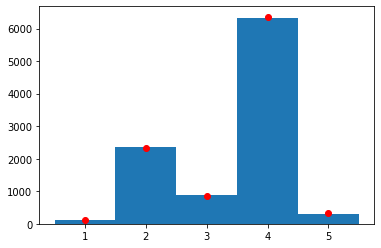

In [3]:
def deltaJ(to, origin, J):
    return J[to] - J[origin]


def f_boltz(to, origin, T, J):
    return np.exp(-deltaJ(to, origin, J)/T)


def acept_trans_prob(to, origin, T, J):
    return min(f_boltz(to, origin, T, J), 1.0)


def get_transition_matrix(T, J):
    l = len(J.items())
    tm = np.zeros((l, l))
    for j in range(len(tm)):
        for i in range(len(tm[0])):
            if (i == (j+1) % l) or (i == (j-1) % l):
                tm[i, j] = 0.5 * acept_trans_prob(i+1, j+1, T, J)
        tm[j, j] = 1 - sum(tm[:, j])

    return tm



if __name__ == "__main__":

    J = {
        1: .5,
        2: .2,
        3: .3,
        4: .1,
        5: .4
    }

    T = 0.1
    tm = get_transition_matrix(T, J)
    print("#### item a ####")
    print("Problema modificado, proposto na lista 2 enviada em 14ABR22:")
    print(tm)

    print("#### item b ####")

    print("#### item c ####")
    print("O vetor invariante corresponde ao autovetor "
          "\"normalizado\" para somar 1, associado ao autovalor"
          "unitário")

    val, vec = np.linalg.eig(tm)
    print(val)
    print(vec)

    idx_unitario = np.where(np.around(val, 1) == 1)[0].item()
    vec_prob = vec.T[idx_unitario]
    vec_prob = vec_prob/sum(vec_prob)

    print("Vetor invariante associado a matriz de transição M do item a: \n v = {}".format(vec_prob))

    print("#### item d ####")
    fb = []
    T = .1
    for j_i in J.values():
        fb.append(np.exp(-j_i/T))

    fb = np.array(fb)
    fb_norm = fb/sum(fb)
    print("Vetor dos fatores de Boltzmann: \n{}".format(fb))
    print("Vetor dos fatores de Boltzmann normalizado: \n{}".format(fb_norm))
    print("Diferenças entre os fatores de Boltzmann e o "
          "vetor de probabilidades: \n{}".format(vec_prob - fb_norm))
    print("Portanto os vetore são iguais")

    print("#### item e ####")
    # Metropolis Algorithm

    Ts = [0.100, 0.0631, 0.0500, 0.0431, 0.0387, 0.0356, 0.0333, 0.0315, 0.0301, 0.0289]
    idx_T = 0
    T = Ts[idx_T]

    x_n = rd.choice(list(J.keys()))
    n = 0
    kT = Ts[0]
    N = 1000 * len(Ts)
    M = N
    epsilon = 1
    stable_states = []

    while n < N:
        R = rd.choice((-1, 1))
        x_hat = x_n + epsilon * R
        if x_hat == 6:
            x_hat = 1
        if x_hat == 0:
            x_hat = 5

        _deltaJ = J[x_hat] - J[x_n]

        q = np.exp(-_deltaJ / kT)
        r = rd.uniform(0, 1)

        a = 0 if r > q else 1

        if _deltaJ < 0:
            x_n = x_hat
        else:
            x_n = (1 - a) * x_n + a * x_hat

        n += 1

        if n > N - M:
            stable_states.append(x_n)

        if n % 1000 == 0:
            if n == N:
                continue
            else:
                idx_T += 1
                T = Ts[idx_T]
    
    print("Foi utilizado o algoritmo de metropolis para gerar amostras nos estados possíveis, o histograma a seguir compara a contagem dos estados obtidos em azul, com o valor esperado, ou seja N * vec_prob, em vermelho")
    plt.hist(stable_states, bins=(np.arange(len(J.keys())+1)+.5))
    plt.scatter(list(J.keys()), vec_prob*N, c='red')




03) Lista de Exercícios da CPE723 Edição Presencial - Exercício 3.

![q3](img/Q3.png)


04) Prova de 2009 - Questão 2, itens (a) e (c) (resolvida em aula no dia 12/04/2022).

![q4](img/Q4.png)


In [4]:
if __name__ == "__main__":

    J = {
        1: .3,
        2: .1,
        3: .1,
        4: .2
    }

    fb_t1 = []
    fb_t01 = []
    for v in J.values():
        fb_t01.append(np.exp(-v / 0.1))
        fb_t1.append(np.exp(-v / 1))

    fb_t1 = np.array(fb_t1)
    fb_t01 = np.array(fb_t01)

    print("Valores dos fatores de Boltzmann (T = 1.0): \n{}".format(fb_t1))
    print("Valores dos fatores de Boltzmann (T = 0.1): \n{}".format(fb_t01))


    print(" #### item c ####")
    tm_t1  = get_transition_matrix(1.0, J)
    tm_t01 = get_transition_matrix(0.1, J)

    print("Matriz de transição para T = 1.0")
    print(tm_t1)

    val, vec = np.linalg.eig(tm_t1)
    idx_unit = np.where(np.around(val, 1) == 1)[0].item()
    vec_prob_t1 = vec.T[idx_unit]
    vec_prob_t1 = vec_prob_t1 / sum(vec_prob_t1)
    fb_t1_norm = fb_t1 / sum(fb_t1)

    print("Vetor invariante (T=1.0): \n {}".format(vec_prob_t1))
    print("Vetor dos fatores de Boltzmann (T = 1.0): \n{}".format(fb_t1))
    print("Vetor dos fatores de Boltzmann normalizado: \n{}".format(fb_t1))
    print("Diferenças entre os fatores de Boltzmann e o "
          "vetor de probabilidades: \n{}".format(vec_prob_t1 - fb_t1_norm))
    print("Portanto os vetores são iguais")


    print("Matriz de transição para T = 0.1")
    print(tm_t01)

    val, vec = np.linalg.eig(tm_t01)
    idx_unit = np.where(np.around(val, 1) == 1)[0].item()
    vec_prob_t01 = vec.T[idx_unit]
    vec_prob_t01 = vec_prob_t01 / sum(vec_prob_t01)
    fb_t01_norm = fb_t01 / sum(fb_t01)

    print("Vetor invariante (T=0.1): \n {}".format(vec_prob_t01))
    print("Vetor dos fatores de Boltzmann (T = 0.1): \n{}".format(fb_t01))
    print("Vetor dos fatores de Boltzmann normalizado: \n{}".format(fb_t01))
    print("Diferenças entre os fatores de Boltzmann e o "
          "vetor de probabilidades: \n{}".format(vec_prob_t01 - fb_t01_norm))
    print("Portanto os vetores são iguais")




Valores dos fatores de Boltzmann (T = 1.0): 
[0.74081822 0.90483742 0.90483742 0.81873075]
Valores dos fatores de Boltzmann (T = 0.1): 
[0.04978707 0.36787944 0.36787944 0.13533528]
 #### item c ####
Matriz de transição para T = 1.0
[[0.         0.40936538 0.         0.45241871]
 [0.5        0.09063462 0.5        0.        ]
 [0.         0.5        0.04758129 0.5       ]
 [0.5        0.         0.45241871 0.04758129]]
Vetor invariante (T=1.0): 
 [0.21987801 0.26855961 0.26855961 0.24300278]
Vetor dos fatores de Boltzmann (T = 1.0): 
[0.74081822 0.90483742 0.90483742 0.81873075]
Vetor dos fatores de Boltzmann normalizado: 
[0.74081822 0.90483742 0.90483742 0.81873075]
Diferenças entre os fatores de Boltzmann e o vetor de probabilidades: 
[-2.77555756e-17 -2.22044605e-16  1.11022302e-16 -5.55111512e-17]
Portanto os vetores são iguais
Matriz de transição para T = 0.1
[[0.         0.06766764 0.         0.18393972]
 [0.5        0.43233236 0.5        0.        ]
 [0.         0.5        0.316

05) Prova de 2011 - Questão 2, itens (a), (b), e (e).

![q5](img/Q5.png)


06) (Opcional/Desafio) Prova de 2012 - Questão 3.

![q6_a](img/Q6_a.png)
![q6_b](img/Q6_b.png)

07) Prova de 2016 - Questão 2.

![q7](img/Q7.png)

 #### item a ####
A partir das transições M1 00 -> 10, M2 10 -> 11, e M1 01 -> 11, temos que:
J00 = 1
J01 = 2.09861228866811
J11 = 3.19722457733622
J10 = 2.09861228866811
 #### item b ####
Existe p=0.5 de se alterar cada bit. Portanto a matriz de transição de cada passo deve ser composta de maneira que M = .5 * M1 + .5 * M2. Desta forma temos que M = 
[[0.66666667 0.5        0.         0.5       ]
 [0.16666667 0.33333333 0.5        0.        ]
 [0.         0.16666667 0.         0.16666667]
 [0.16666667 0.         0.5        0.33333333]]
 #### item c ####
Vetor invariante normalizado: PI = [0.5625 0.1875 0.0625 0.1875]
M1 * PI - PI: [ 1.11022302e-16 -2.77555756e-17  1.38777878e-17 -1.11022302e-16]
M2 * PI - PI: [ 1.11022302e-16 -1.38777878e-16  0.00000000e+00  0.00000000e+00]
Comparativo de probabilidades: 


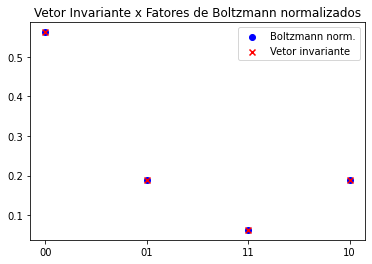

In [3]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

if __name__ == "__main__":
    print(" #### item a ####")
    T = 1
    J00 = 1

    # M1 00 -> 10:
    # 1/3 = exp(-(J10 - J00)/T)
    # ln(1/3) = -J10 + 1
    J10 = 1 - np.log(1/3)

    # M2 10 -> 11:
    # 1/3 = exp(-(J11 - J10)/T)
    # ln(1/3) = -J11 + J10
    J11 = J10 - np.log(1/3)

    # M1 01 -> 11:
    # 1/3 = exp(-(J11 - J01)/T)
    # ln(1/3) = -J11 + J01
    J01 = np.log(1/3) + J11

    print("A partir das transições M1 00 -> 10, M2 10 -> 11, e M1 01 -> 11, temos que:")
    print("J00 = {}".format(J00))
    print("J01 = {}".format(J01))
    print("J11 = {}".format(J11))
    print("J10 = {}".format(J10))

    print(" #### item b ####")
    M1 = np.array([[2 / 3, 0, 0, 1],
                   [0, 2 / 3, 1, 0],
                   [0, 1 / 3, 0, 0],
                   [1 / 3, 0, 0, 0]])

    M2 = np.array([[2 / 3, 1, 0, 0],
                   [1 / 3, 0, 0, 0],
                   [0, 0, 0, 1 / 3],
                   [0, 0, 1, 2 / 3]])

    M = .5 * M1 + .5 * M2

    print("Existe p=0.5 de se alterar cada bit. Portanto a matriz de transição de cada passo "
          "deve ser composta de maneira que M = .5 * M1 + .5 * M2. Desta forma temos que M = \n{}".format(M))

    print(" #### item c ####")
    val, vec = np.linalg.eig(M)
    idx_unit = np.where(np.around(val, 1) == 1)[0].item()
    vec_prob = vec.T[idx_unit]
    vec_prob = vec_prob/sum(vec_prob)
    print("Vetor invariante normalizado: PI = {}".format(vec_prob))
    print("M1 * PI - PI: {}".format(np.matmul(M1, vec_prob) - vec_prob))
    print("M2 * PI - PI: {}".format(np.matmul(M2, vec_prob) - vec_prob))

    print("Comparativo de probabilidades: ")
    fb = np.array([np.exp(-J00), np.exp(-J01), np.exp(-J11), np.exp(-J10)])
    fb_norm = fb/sum(fb)

    plt.scatter(range(4), fb_norm, c='blue', marker='o', label="Boltzmann norm.")
    plt.scatter(range(4), vec_prob, c='red', marker='x', label="Vetor invariante")
    plt.xticks(range(4), ['00', '01', '11', '10'])
    plt.title("Vetor Invariante x Fatores de Boltzmann normalizados")
    plt.legend()



08) Prova de 2016 - Questão 3.

![q8_a](img/Q8_a.png)
![q8_b](img/Q8_b.png)


09) Prova de 2017 - Questão 3, itens (b) e (c).

![q9](img/Q9.png)

10) Prova de 2018 - Questão 3

![q10](img/Q10.png)
